In [1]:
import os
os.chdir("/Users/daniellengyel/Projects/simgrad")

import numpy as np
import matplotlib.pyplot as plt

from functions.ackley import Ackley

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from simplex_grad.simplex_grad import simplex_grad, simplex_grad_mse

import sample_set.CASG.eCASG as eCASG
import sample_set.FFD.FFD as FFD
import sample_set.CFD.CFD as CFD

from numerics.ackley_numerics import run_comp
from numerics.config_utils import generate_configs

from numerics.utils import plot_figs_N_RBF

from global_model.RBF import RBF

from tqdm import tqdm

%load_ext autoreload
%autoreload 2


sig_1e-05_d_4


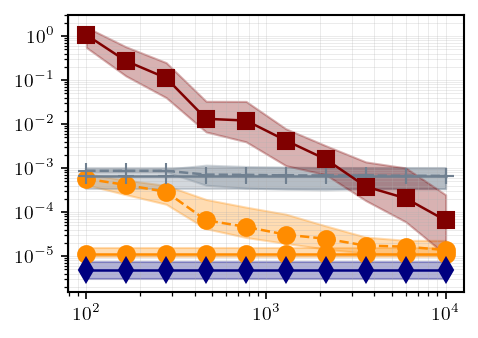

sig_1e-05_d_8


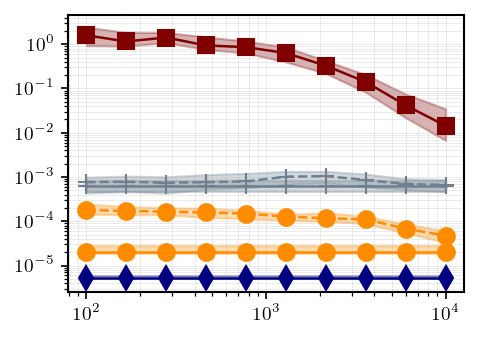

sig_1e-05_d_9


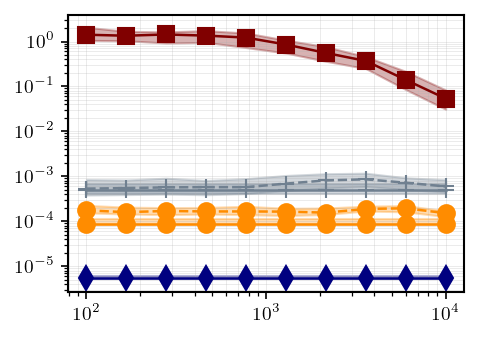

sig_1e-05_d_10


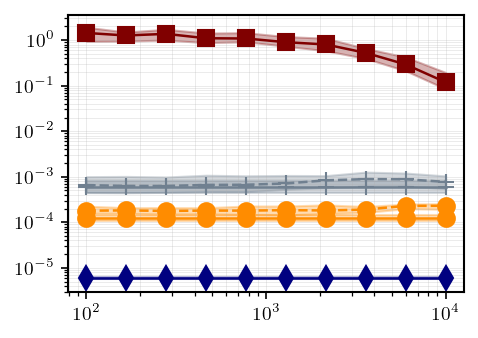

sig_0.001_d_4


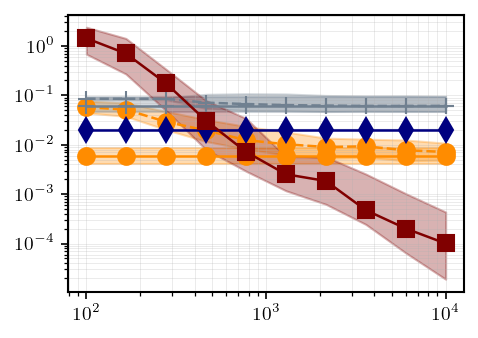

sig_0.001_d_8


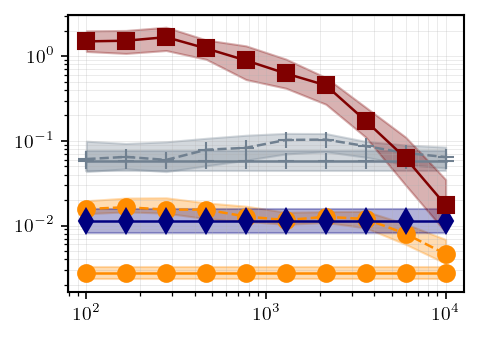

sig_0.001_d_9


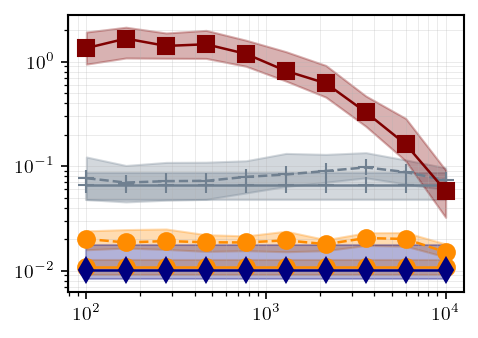

sig_0.001_d_10


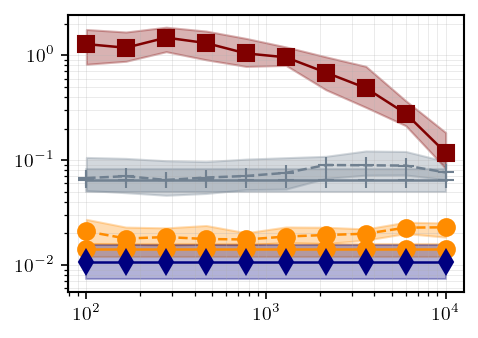

In [98]:
numerics_path = "/Users/daniellengyel/Projects/simgrad/numerics"

plot_figs_N_RBF("Ackley", df, numerics_path)

In [ ]:
# We should present both 1e-3 and 1e-5. 
# The point is that even in the worst case, CASG is better than even best FFD
# How can CFD do worse than CASG? Is this based on the structure of 

In [3]:
from numerics.quadratic_numerics import run_comp

In [52]:
from numerics.utils import plot_figs_exact_loss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from functions.quadratic import Quadratic


In [81]:
XY.shape

(2, 10000)

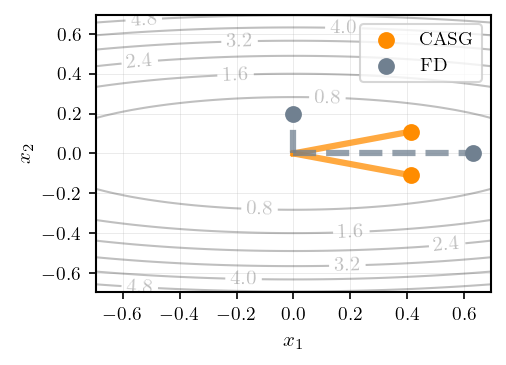

In [88]:
sig = 0.1

d = 2
x_0 = np.zeros(2)
h = 1

Q = np.array([[1, 0], [0, 10]])
    
F = Quadratic(Q, b=np.zeros(d), c=0, sig=0)
H = F.f2(x_0)  
Q = 1/2. * H      

S_FFD = FFD.gen_sample_set(Q, sig, h)
S_CASG = eCASG.gen_sample_set(Q, sig, h)


lim = np.max(np.abs(S_FFD))*1.1


X = np.linspace(-lim, lim, 100)
X, Y = np.meshgrid(X, X)
XY = np.vstack([X.ravel(), Y.ravel()])
Z = F.f_batch(XY.T).reshape(X.shape[0], Y.shape[0]) #np.diag(XY.T @ D @ XY).reshape(X.shape[0], Y.shape[0])

# levels = [lev**2 for lev in np.linspace(0, np.sqrt(lim**2 + a * lim**2), 10)]

cp = plt.contour(X, Y, Z, colors="black", vmax=1,  linewidths=1, alpha=0.25) 
cp.clabel()

plt.scatter(S_CASG[0], S_CASG[1], color="darkorange", zorder=3, s=50, label="CASG")
plt.scatter(S_FFD[0], S_FFD[1], color="slategrey", zorder=3, s=50, label="FD")

plt.plot([0, S_CASG[0, 0]], [0, S_CASG[1, 0]], linewidth=3, color="darkorange", alpha=0.75, zorder=2)
plt.plot([0, S_CASG[0, 1]], [0, S_CASG[1, 1]], linewidth=3, color="darkorange", alpha=0.75, zorder=2)

plt.plot([0, S_FFD[0, 0]], [0, S_FFD[1, 0]], linewidth=3, linestyle="--", color="slategrey", alpha=0.75, zorder=2)
plt.plot([0, S_FFD[0, 1]], [0, S_FFD[1, 1]], linewidth=3, linestyle="--", color="slategrey", alpha=0.75, zorder=2)


plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.legend()


#     plt.savefig("Figures/a_{}_sig_{}_2d.pdf".format(a, sig))
#     tikzplotlib.save("Figures/a_{}_sig_{}_2d.tex".format(a, sig))


plt.show()
    


In [103]:
from numerics.utils import figure_methods_confs

In [122]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def plot_sample_set(Q, d, h, sig):
    
    F = Quadratic(Q, b=np.zeros(d), c=0, sig=0)
    H = F.f2(x_0)  
    Q = 1/2. * H      

    S_FFD = FFD.gen_sample_set(Q, sig, h)
    S_CASG = eCASG.gen_sample_set(Q, sig, h)

    lim = max(np.max(np.abs(S_CASG)), np.max(np.abs(S_FFD)))*1.1


    X = np.linspace(-lim, lim, 100)
    X, Y = np.meshgrid(X, X)
    XY = np.vstack([X.ravel(), Y.ravel()])
    Z = F.f_batch(XY.T).reshape(X.shape[0], Y.shape[0])


    # Plot contours and labels
    cp = plt.contour(X, Y, Z, colors="black", vmax=1, linewidths=1, alpha=0.25) 
    cp.clabel()

    # Plot points
    plt.scatter(S_CASG[0], S_CASG[1], color=figure_methods_confs['CASG']['color'], zorder=3, s=50)
    plt.scatter(S_FFD[0], S_FFD[1], color=figure_methods_confs['FFD']['color'], marker="d", zorder=3, s=50)

    # Plot lines
    plt.plot([0, S_CASG[0, 0]], [0, S_CASG[1, 0]], linewidth=2, linestyle=figure_methods_confs['CASG']['linestyle'], color=figure_methods_confs['CASG']['color'], alpha=0.75, zorder=2)
    plt.plot([0, S_CASG[0, 1]], [0, S_CASG[1, 1]], linewidth=2, linestyle=figure_methods_confs['CASG']['linestyle'], color=figure_methods_confs['CASG']['color'], alpha=0.75, zorder=2)

    plt.plot([0, S_FFD[0, 0]], [0, S_FFD[1, 0]], linewidth=2, linestyle="--", color=figure_methods_confs['FFD']['color'], alpha=0.75, zorder=2)
    plt.plot([0, S_FFD[0, 1]], [0, S_FFD[1, 1]], linewidth=2, linestyle="--", color=figure_methods_confs['FFD']['color'], alpha=0.75, zorder=2)

    # Axes limits and labels
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

    # --- Custom legend handles ---
    casg_handle = Line2D([0], [0], marker='o', color="darkorange", label="CASG",
                        markersize=6, linewidth=1)
    ffd_handle = Line2D([0], [0], marker='d', color="slategrey", label="FFD",
                        markersize=6, linewidth=1, linestyle='--')

    plt.legend(handles=[casg_handle, ffd_handle])


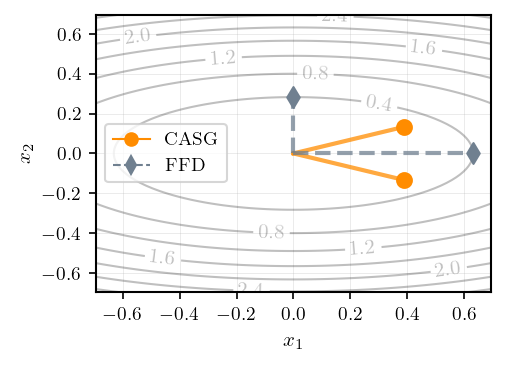

In [125]:
Q = np.array([[1, 0], [0, 5]])
plot_sample_set(Q, d, h, sig)

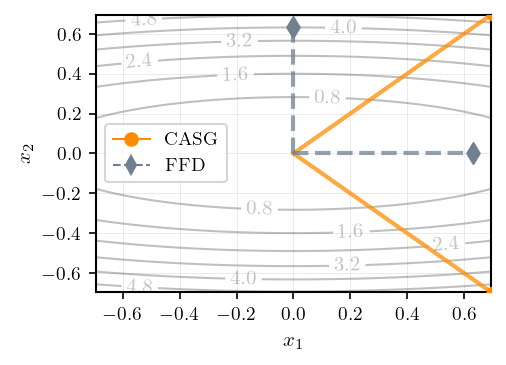

In [113]:
plot_sample_set(Q, d, h, sig)

In [127]:
from numerics.quadratic_numerics import ill_cond_operator

In [152]:
kappa = 10

# Get Symmetric Quadratic
D = np.eye(d)
D_indef = np.ones(d)
D_indef[:d // 2] = -1
D_indef = np.diag(D_indef)

R = np.linalg.qr(np.random.randn(d, d))[0]
Q_def = R.T @ D @ R
Q_indef = R.T @ D_indef @ R


# Add ill conditioning
v = np.random.normal(size=d)
T = ill_cond_operator(kappa**0.5, v)
Q_def = T.T @ Q_def @ T
Q_indef = T.T @ Q_indef @ T

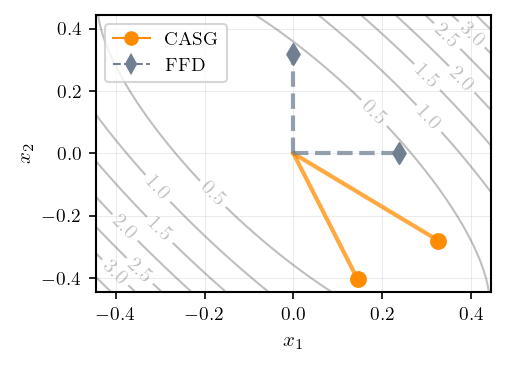

In [154]:
plot_sample_set(Q_def, d, h, sig)

In [523]:
with open("numerics/results/ackley_res.pkl", 'rb') as f:
    df = pickle.load(f)[2]

In [ ]:
df

,sig,h,d,N_RBF,method,median,25pct,75pct
0,0.00100,1.000,4,100,FFD,0.090820,0.060177,0.101604
1,0.00100,1.000,4,100,CASG,22.195689,4.663931,37.205191
2,0.00100,1.000,4,100,CFD,13.001068,7.674853,20.066082
3,0.00100,1.000,4,100,FFD_rbf,0.151538,0.080719,0.317952
4,0.00100,1.000,4,100,CASG_rbf,4.976841,3.410019,10.444926
...,...,...,...,...,...,...,...,...
19,0.00001,0.001,10,10000,CASG,0.002010,0.002009,0.002011
20,0.00001,0.001,10,10000,CFD,0.000500,0.000500,0.000500
21,0.00001,0.001,10,10000,FFD_rbf,0.002019,0.002013,0.002020
22,0.00001,0.001,10,10000,CASG_rbf,0.002009,0.002008,0.002011


In [525]:
keys = ['method', 'sig', 'd', 'N_RBF']

# Group by 'group' and get index of rows with minimum 'b' in each group
min_h_idx = df.groupby(keys)['median'].idxmin()
result = df.loc[min_h_idx].reset_index(drop=True)

In [529]:
min_h_idx.shape

(528,)

In [501]:
with open('tmp.pkl', 'rb') as f:
    confs = pickle.load(f)

In [506]:
with open('tmp_res.pkl', 'rb') as f:
    res = pickle.load(f)

In [515]:
d1 = [p[0] for p in res]

In [517]:
d1_f = pd.concat(d1)

In [520]:
2 * 4 * 4 * 11 * 6

2112

In [519]:
d1_f.shape

(2112, 8)

In [522]:
result.shape

(46464, 8)

In [499]:
np.unique_counts(result[(result['method'] == 'CASG') & (result['d'] == 4) & (result['sig'] == 1e-3)]['sig'])


UniqueCountsResult(values=array([0.001]), counts=array([968]))

In [474]:
df[(df['method'] == 'CASG') & (df['d'] == 4)]

,sig,h,d,N_RBF,method,median,25pct,75pct
1,0.00100,1.000,4,100,CASG,20.170868,6.102013,30.213385
7,0.00100,0.100,4,100,CASG,0.008803,0.004913,0.011395
13,0.00100,0.010,4,100,CASG,0.080232,0.080020,0.080809
19,0.00100,0.001,4,100,CASG,8.000002,8.000000,8.000007
1,0.00100,1.000,4,158,CASG,9.443507,3.325577,22.206427
...,...,...,...,...,...,...,...,...
19,0.00001,0.001,4,6309,CASG,0.000803,0.000801,0.000877
1,0.00001,1.000,4,10000,CASG,5.654255,2.579976,20.939973
7,0.00001,0.100,4,10000,CASG,0.003234,0.002255,0.005622
13,0.00001,0.010,4,10000,CASG,0.000011,0.000009,0.000015
